## Import libs

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

## Load the data

In [2]:
df_initial = pd.read_csv('mall_customers.csv')
df_initial.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## Primary analysis

In [100]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [101]:
df_initial.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


F:\anaconda_egor\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

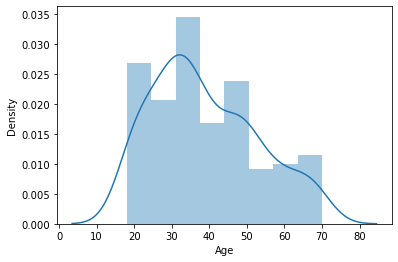

In [3]:
sns.distplot(df_initial['Age'])

F:\anaconda_egor\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

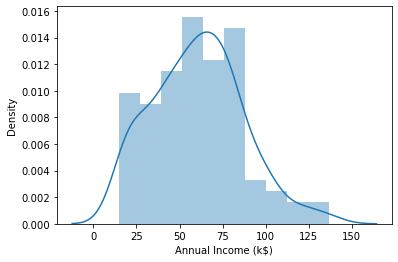

In [4]:
sns.distplot(df_initial['Annual Income (k$)'])

F:\anaconda_egor\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

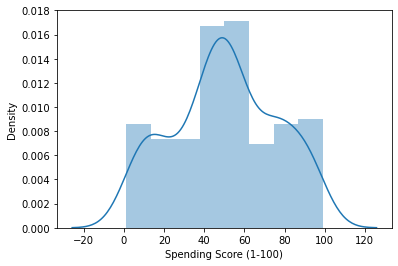

In [5]:
sns.distplot(df_initial['Spending Score (1-100)'])

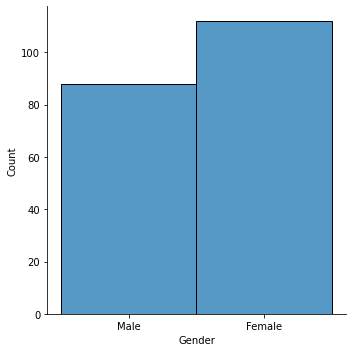

In [6]:
sns.displot(df_initial['Gender'])

In [7]:
##Проверить на нормальность по видосу

In [8]:
df_features = df_initial.drop(['CustomerID', 'Gender'], axis=1)\
.rename(columns={'Age': 'age', 'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'})

In [9]:
df_features.head(5)

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


<AxesSubplot:xlabel='age', ylabel='spending_score'>

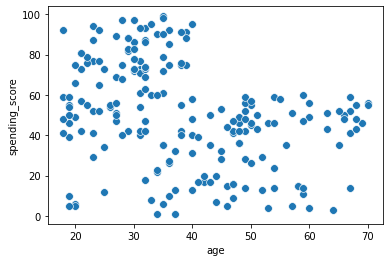

In [60]:
sns.scatterplot(x='age', y='spending_score', data=df_features, s=60)

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

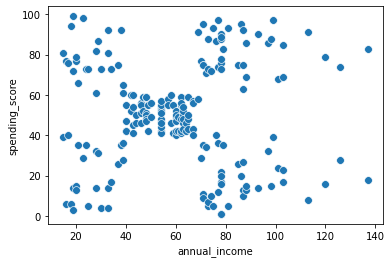

In [59]:
sns.scatterplot(x='annual_income', y='spending_score', data=df_features, s=60)

<AxesSubplot:xlabel='age', ylabel='annual_income'>

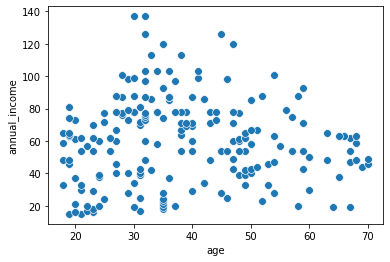

In [58]:
sns.scatterplot(x='age', y='annual_income', data=df_features, s=60)

## Scaling

In [13]:
scaler = MinMaxScaler()

In [14]:
df_features_scaled = \
pd.DataFrame(scaler.fit_transform(df_features), columns=['age_scaled', 'annual_income_scaled', 'spending_score_scaled'])

In [15]:
df_features_scaled.head(5)

,age_scaled,annual_income_scaled,spending_score_scaled
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


## Primary clustering

In [16]:
pair_1 = df_features_scaled[['age_scaled', 'annual_income_scaled']]
pair_2 = df_features_scaled[['age_scaled', 'spending_score_scaled']]
pair_3 = df_features_scaled[['annual_income_scaled', 'spending_score_scaled']]

#### Model_1 (age_scaled and annual_income_scaled)

In [17]:
model_1 = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=42, algorithm='elkan')

In [18]:
model_1.fit(pair_1.values)

KMeans(algorithm='elkan', n_clusters=4, random_state=42)

In [19]:
clasters_1 = model_1.predict(pair_1.values)

In [20]:
pair_1['number_of_claster'] = model_1.labels_

In [21]:
pair_1.head(5)

,age_scaled,annual_income_scaled,number_of_claster
0,0.019231,0.000000,1
1,0.057692,0.000000,1
2,0.038462,0.008197,1
3,0.096154,0.008197,1
4,0.250000,0.016393,1


<AxesSubplot:xlabel='age_scaled', ylabel='annual_income_scaled'>

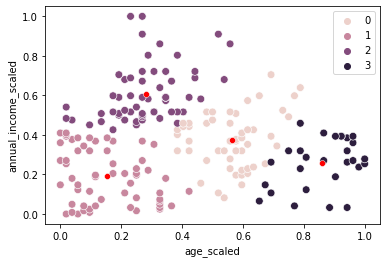

In [22]:
sns.scatterplot(x='age_scaled', y='annual_income_scaled', data=pair_1, hue=pair_1['number_of_claster'], s=60)
sns.scatterplot(x = model_1.cluster_centers_[:, 0], y = model_1.cluster_centers_[:, 1], color='red')

In [23]:
sil_score_1 = silhouette_score(pair_1.drop(['number_of_claster'], axis=1), pair_1['number_of_claster'])
sil_score_1

0.3906120606897494

#### Model_2 (age_scaled and spending_score_scaled)

In [24]:
model_2 = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=42, algorithm='elkan')

In [25]:
model_2.fit(pair_2.values)

KMeans(algorithm='elkan', n_clusters=5, random_state=42)

In [26]:
clasters_2 = model_2.predict(pair_2.values)

In [27]:
pair_2['number_of_claster'] = model_2.labels_

In [28]:
pair_2.head(5)

,age_scaled,spending_score_scaled,number_of_claster
0,0.019231,0.387755,0
1,0.057692,0.816327,3
2,0.038462,0.051020,0
3,0.096154,0.775510,3
4,0.250000,0.397959,0


<AxesSubplot:xlabel='age_scaled', ylabel='spending_score_scaled'>

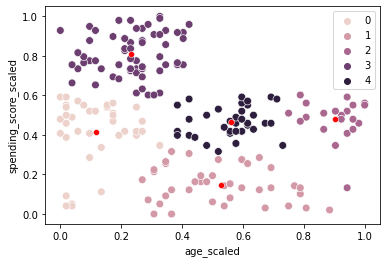

In [29]:
sns.scatterplot(x='age_scaled', y='spending_score_scaled', data=pair_2, hue=pair_2['number_of_claster'], s=60)
sns.scatterplot(x = model_2.cluster_centers_[:, 0], y = model_2.cluster_centers_[:, 1], color='red')

In [30]:
sil_score_2 = silhouette_score(pair_2.drop(['number_of_claster'], axis=1), pair_2['number_of_claster'])
sil_score_2

0.44625330587100703

#### Model_3 (annual_income_scaled and speding_score_scaled)

In [31]:
model_3 = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=42, algorithm='elkan')

In [32]:
model_3.fit(pair_3.values)

KMeans(algorithm='elkan', n_clusters=5, random_state=42)

In [33]:
clasters_3 = model_3.predict(pair_3.values)

In [34]:
pair_3['number_of_claster'] = model_3.labels_

In [35]:
pair_3.head(5)

,annual_income_scaled,spending_score_scaled,number_of_claster
0,0.000000,0.387755,2
1,0.000000,0.816327,3
2,0.008197,0.051020,2
3,0.008197,0.775510,3
4,0.016393,0.397959,2


<AxesSubplot:xlabel='annual_income_scaled', ylabel='spending_score_scaled'>

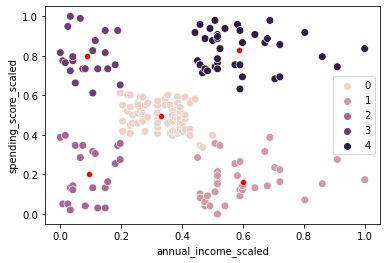

In [36]:
sns.scatterplot(x='annual_income_scaled', y='spending_score_scaled', data=pair_3, hue=pair_3['number_of_claster'], s=60)
sns.scatterplot(x = model_3.cluster_centers_[:, 0], y = model_3.cluster_centers_[:, 1], color='red')

In [37]:
sil_score_3 = silhouette_score(pair_3.drop(['number_of_claster'], axis=1), pair_3['number_of_claster'])
sil_score_3

0.5594854531227246

## Simple analysis of clastering

#### Visualization of clusters in 3d 

In [38]:
df_features_scaled['number_of_claster'] = pair_3['number_of_claster']

In [39]:
df_triple = df_features_scaled
df_triple.head(5)

,age_scaled,annual_income_scaled,spending_score_scaled,number_of_claster
0,0.019231,0.000000,0.387755,2
1,0.057692,0.000000,0.816327,3
2,0.038462,0.008197,0.051020,2
3,0.096154,0.008197,0.775510,3
4,0.250000,0.016393,0.397959,2


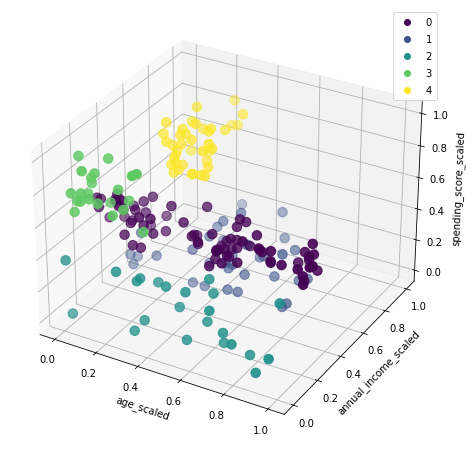

In [40]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

x = df_triple['age_scaled']
y = df_triple['annual_income_scaled']
z = df_triple['spending_score_scaled']

ax.set_xlabel('age_scaled')
ax.set_ylabel("annual_income_scaled")
ax.set_zlabel("spending_score_scaled")

scatter = ax.scatter(x, y, z, c=df_triple['number_of_claster'], s=90)
plt.legend(*scatter.legend_elements())

#### Distribution of clusters

In [57]:
df_distribution_of_clusters = df_triple[['number_of_claster', 'age_scaled']].groupby(['number_of_claster'], as_index=False)\
.count().rename(columns={'age_scaled': 'count'})
df_distribution_of_clusters['percent'] = df_distribution_of_clusters['count'] / df_distribution_of_clusters['count'].sum() * 100
df_distribution_of_clusters

,number_of_claster,count,percent
0,0,81,40.5
1,1,35,17.5
2,2,23,11.5
3,3,22,11.0
4,4,39,19.5


<AxesSubplot:xlabel='number_of_claster', ylabel='count'>

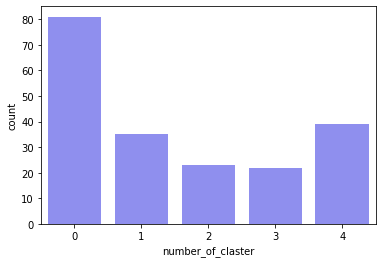

In [42]:
sns.barplot(data=df_distribution_of_clusters, x='number_of_claster', y='count', alpha=0.5, color='blue')

#### Comparison of silhouette scores

In [43]:
sil_scores = pd.DataFrame(data={1: ['pair_1', sil_score_1], 2: ['pair_2', sil_score_2], 3: ['pair_3', sil_score_3]})\
.T.rename(columns={0: 'pair', 1: 'sil_score'})

In [44]:
sil_scores

,pair,sil_score
1,pair_1,0.390612
2,pair_2,0.446253
3,pair_3,0.559485


<AxesSubplot:xlabel='pair', ylabel='sil_score'>

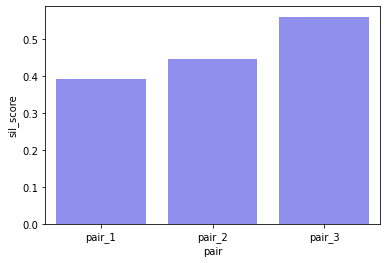

In [45]:
sns.barplot(x='pair', y='sil_score', data=sil_scores, alpha=0.5, color='blue')

## Models optimization

#### Pair_1

F:\anaconda_egor\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'inertia')

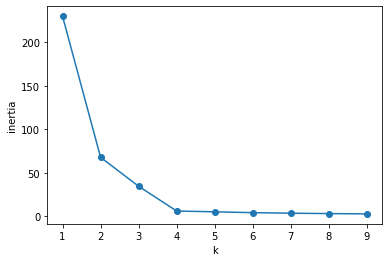

In [70]:
inertia_pair_1 = []
for k in range(1, 10):
    model_1_optim = KMeans(n_clusters=k, random_state=42, init='k-means++')
    model_1_optim.fit(pair_1)
    inertia_pair_1.append(model_1_optim.inertia_)
plt.plot(range(1, 10), inertia_pair_1, marker='o')
plt.xlabel('k')
plt.ylabel('inertia')

In [94]:
df_inertia_1 = pd.DataFrame(inertia_pair_1, range(1, 10), columns=['inertia'])
df_inertia_1

,inertia
1,229.803906
2,67.737218
3,34.500046
4,6.079203
5,5.133368
6,4.185004
7,3.557115
8,3.115554
9,2.738632


Initially i chose the best count of clusters. In another case i would have to create a new model with a correct count of clusters.

#### Pair 2

F:\anaconda_egor\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'inertia')

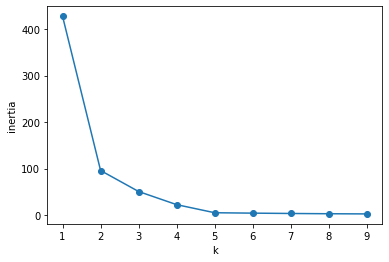

In [75]:
inertia_pair_2 = []
for k in range(1, 10):
    model_2_optim = KMeans(n_clusters=k, random_state=42, init='k-means++')
    model_2_optim.fit(pair_2)
    inertia_pair_2.append(model_2_optim.inertia_)
plt.plot(range(1, 10), inertia_pair_2, marker='o')
plt.xlabel('k')
plt.ylabel('inertia')

In [95]:
df_inertia_2 = pd.DataFrame(inertia_pair_2, range(1, 10), columns=['inertia'])
df_inertia_2

,inertia
1,427.373338
2,95.806772
3,50.634512
4,22.406100
5,5.026143
6,4.180039
7,3.456103
8,2.888845
9,2.510564


#### Pair 3

F:\anaconda_egor\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'inertia')

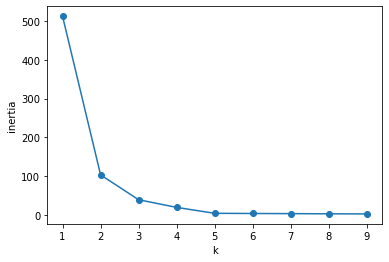

In [96]:
inertia_pair_3 = []
for k in range(1, 10):
    model_3_optim = KMeans(n_clusters=k, random_state=42, init='k-means++')
    model_3_optim.fit(pair_3)
    inertia_pair_3.append(model_3_optim.inertia_)
plt.plot(range(1, 10), inertia_pair_3, marker='o')
plt.xlabel('k')
plt.ylabel('inertia')

In [97]:
df_inertia_3 = pd.DataFrame(inertia_pair_3, range(1, 10), columns=['inertia'])
df_inertia_3

,inertia
1,512.995720
2,102.883468
3,38.627178
4,18.827848
5,3.583118
6,3.098385
7,2.746918
8,2.279398
9,1.999657


## Viewing the data without scaling divided into groups

In [107]:
df_for_viewing = df_initial.drop(['CustomerID', 'Gender'], axis=1)\
.rename(columns={'Age':'age', 'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'})
df_for_viewing['number_of_claster'] = pair_3['number_of_claster']
df_for_viewing

,age,annual_income,spending_score,number_of_claster
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2
...,...,...,...,...
195,35,120,79,4
196,45,126,28,1
197,32,126,74,4
198,32,137,18,1


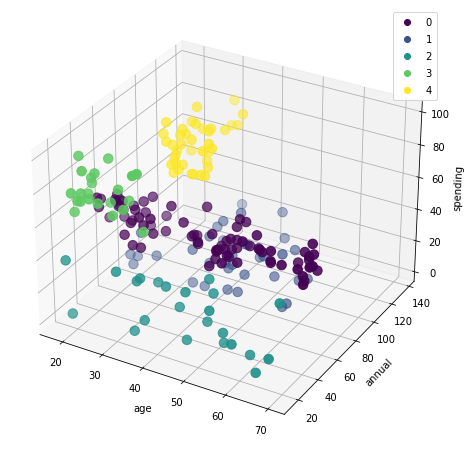

In [108]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

x = df_for_viewing['age']
y = df_for_viewing['annual_income']
z = df_for_viewing['spending_score']

ax.set_xlabel('age')
ax.set_ylabel("annual")
ax.set_zlabel("spending")

scatter = ax.scatter(x, y, z, c=df_for_viewing['number_of_claster'], s=90)
plt.legend(*scatter.legend_elements())